In [296]:
import pandas as pd

Загрузим табличку с нашими данными про длительность поездок такси! 

In [297]:
df = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/taxi_dataset_with_target.csv', index_col=0)

df.head()

,vendor_id,pickup_datetime,passenger_count,store_and_fwd_flag,trip_duration,distance_km
id,,,,,,
id2875421,1,2016-03-14 17:24:55,930.399753,0,455.0,1.500479
id2377394,0,2016-06-12 00:43:35,930.399753,0,663.0,1.807119
id3858529,1,2016-01-19 11:35:24,930.399753,0,2124.0,6.392080
id3504673,1,2016-04-06 19:32:31,930.399753,0,429.0,1.487155
id2181028,1,2016-03-26 13:30:55,930.399753,0,435.0,1.189925


Попробуем построить модель Линейной Регрессии!

В качестве Выборки используйте таргетную колонку (*trip_duration*) и все признаки, кроме времени начала заказа (*pickup_datetime*)

Для начала воспользуемся "коробочным решением". Для этого создайте переменную model, положите в нее класс **LinearRegression** из модуля **linear_model** библиотеки **sklearn**.

Далее воспользуйтесь методом **fit**, положите в него через запятую: массив **X**, состоящий из признаков объектов (можно pandas dataframe'ом, а можно numpy-массивом), и массив **Y** с таргетами.

In [298]:
from sklearn.linear_model import LinearRegression

### Your code is here
X = df[['vendor_id','passenger_count','store_and_fwd_flag','distance_km']]
Y = df['trip_duration']



In [299]:
model=LinearRegression()
model.fit(X, Y)

LinearRegression()

Чтобы посмотреть на значения полученных коэффициентов модели, следует обратиться к атрибуту **coef_** класса линейной регрессии. Для просмотра свободного веса, к атрибуту **intercept_** 

In [300]:
### Your code is here
for column, coef in zip(X.columns, model.coef_):
    print (column, coef)
    
print (model.intercept_)


vendor_id 198.4631367461269
passenger_count 0.2963129479546014
store_and_fwd_flag 56.4691216546317
distance_km 115.27353763048087
171.65658145243458


In [301]:
### Полученные коэффициенты будут являться ответом на задание 5 в ЛМС.
### Перечислите коэффициенты через запятую и пробел, округлив до 3 знаков после точки.
### Используйте точку в качестве десятичного разделителя.

Теперь реализуйте функцию LinearRegressionByMatrix, которая будет принимать на вход 3 параметра:

Матрицу объект-признак **(X)**, вектор с ответами **(Y)**, булевый параметр **fit_intercept**, цель которого - добавить константный признак (состоящий из единичек), если True, и ничего не делать, если False.

Функция должна вернуть одномерный np.array объект с оцененными **$\beta_1, ..., \beta_n, \beta_0$**

Реализуйте решение через аналитическое решение в матрицах из лекции и практики:

$$
\beta^* = (X^T \cdot X)^{-1} \cdot X^T \cdot Y
$$

In [302]:
import numpy as np

### Your code is here
X['constant'] = 1

def LinearRegressionByMatrix(X: np.array, Y: np.array, fit_intercept: bool = True):


        """
        :param X: матрица объектов
        :param Y: вектор (матрица с 1 столбцом) ответов
        :param fit_intercept: добавить ли константную переменную в данные?
        
        :return: одномерный numpy-array с полученными коэффициентами beta
        """
        return final_betas
xxt = np.dot(X.T, X)
xxt_inv = np.linalg.inv(xxt)
xxt_inv_xxt = np.dot(xxt_inv, X.T)
final_betas = np.dot(xxt_inv_xxt, Y)

/var/folders/yx/65wmq5d95ngc9qkd0d31ykw80000gn/T/ipykernel_24335/2371457592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['constant'] = 1


In [303]:
X_train = df.drop(['trip_duration', 'pickup_datetime'], axis=1).values
Y_train = df['trip_duration'].values

print (LinearRegressionByMatrix(X_train, Y_train))

[198.46313674   0.29631295  56.46912165 115.27353763 171.65658145]


In [304]:
### Полученные коэффициенты будут являться ответом на задание 6 в ЛМС.
### Перечислите коэффициенты через запятую и пробел, округлив до 3 знаков после точки.
### Используйте точку в качестве десятичного разделителя.

Получились ли коэффициенты такими же, как и в "коробочном" варианте?

Имея коэффициенты модели, можно восстановить предсказания для каждого объекта!

Сделайте это через операцию матричного произведения матрицы **X** и полученных коэффициентов (как результат работы *LinearRegressionByMatrix*)

In [305]:
### Your code is here
Z = np.zeros((10,10), dtype = np.float64)
print ("%d bytes" % (Z.size * Z.itemsize))
Z.size

800 bytes


100

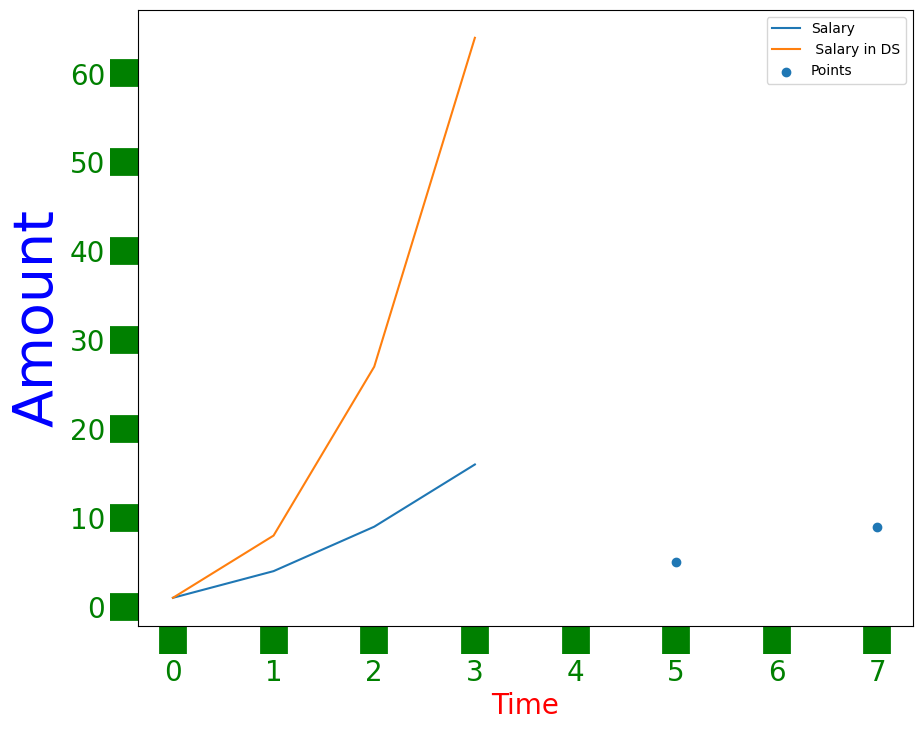

In [306]:
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
fig = plt.figure()
fig.set_size_inches (10, 8)

plt.plot([1,4,9,16])
plt.plot([1,8,27,64])

plt.scatter([5,7],[5,9])

plt.xlabel('Time', fontsize = 20, color = 'red')
plt.ylabel('Amount', fontsize = 40, color='blue')
plt.tick_params(colors='green', labelsize=20, length =20, width = 20)

plt.legend(['Salary', ' Salary in DS', 'Points'])
plt.show()


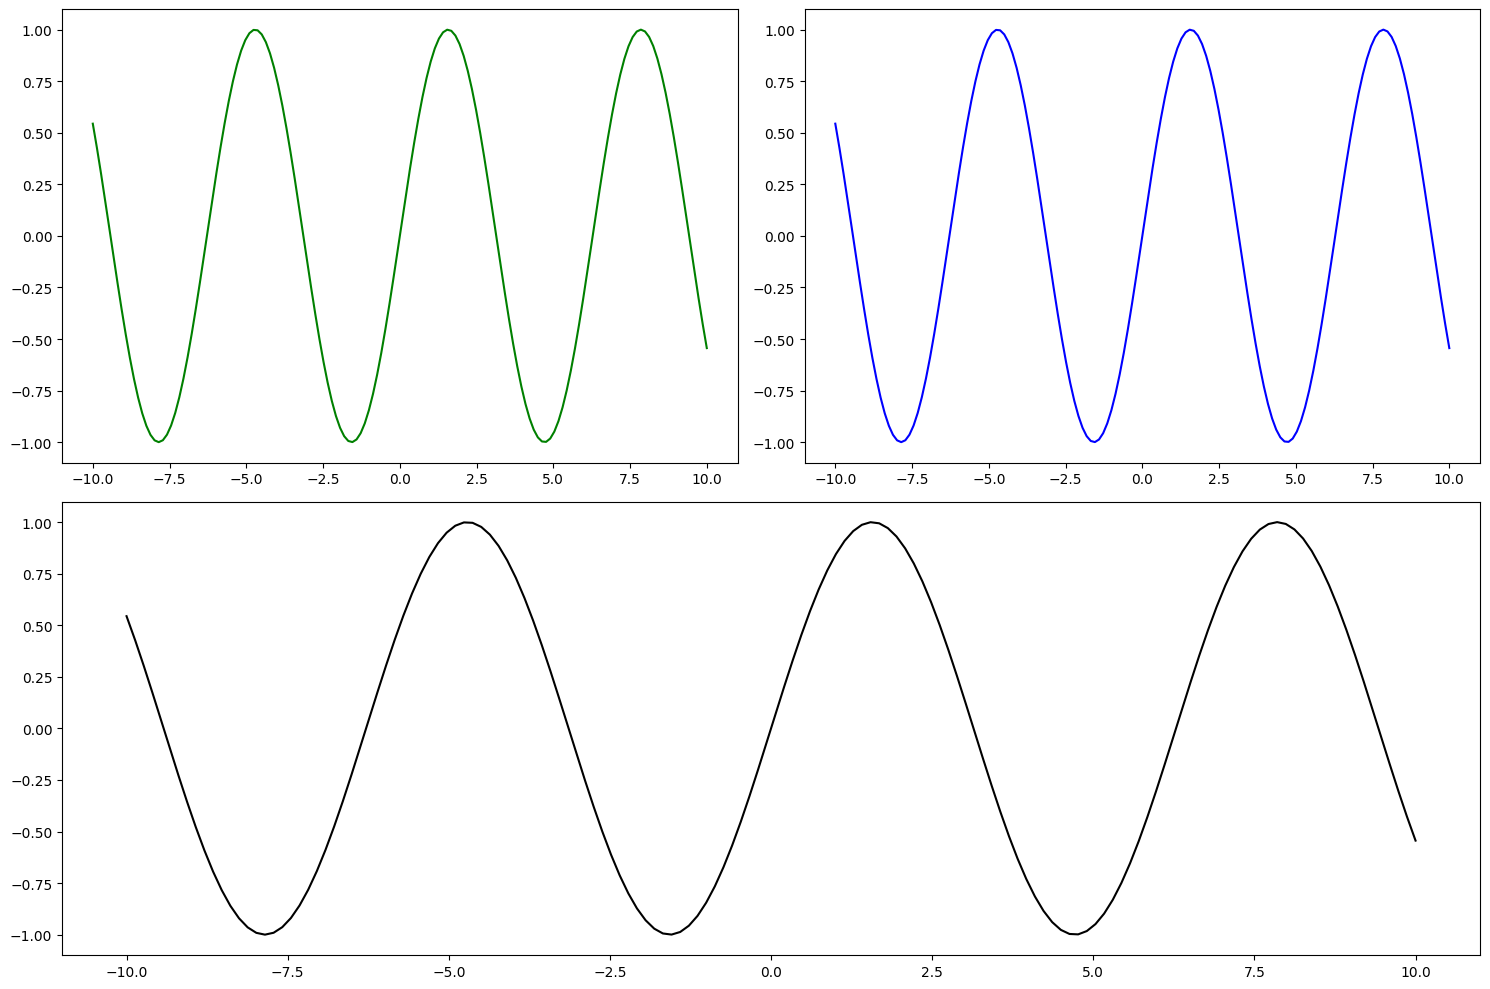

In [307]:
fig = plt.figure()
fig.set_size_inches (15, 10)
x = np.linspace (-10, 10, 150)
y = np.sin(x)


ax1 = fig.add_subplot(2,2,1)
plt.plot(x,y, color='green')
ax2 = fig.add_subplot(2,2,2)
plt.plot(x,y, color='blue')
ax2 = fig.add_subplot(2,1,2)
plt.plot(x,y, color='black')
fig.tight_layout()

plt.show()

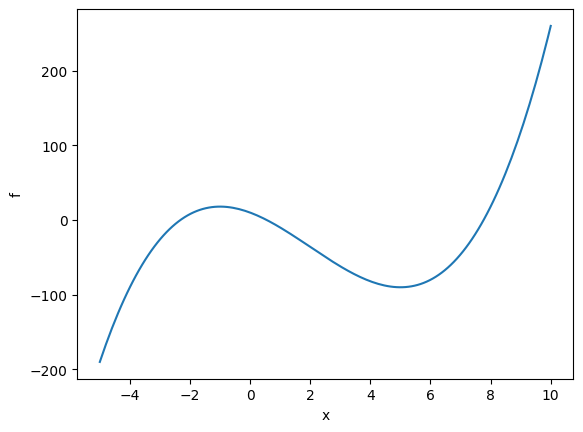

In [308]:
def func(x):
    return x**3 - 6*x**2 - 15*x+10

x = np.linspace(-5,10,150)
fig.set_size_inches(10,8)
plt.plot(x, func(x))
plt.ylabel('f')
plt.xlabel('x')
plt.show()

Point is found X= 5.000382502344409


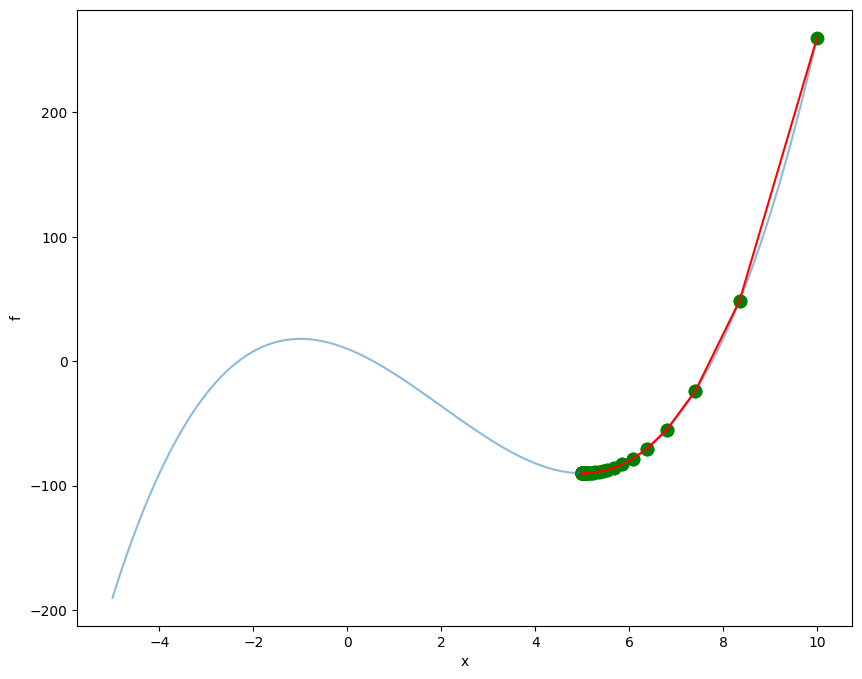

In [316]:
def func(x):
    return x**3 - 6*x**2 - 15*x+10

x = np.linspace(-5,10,150)

def func_derivative(x):
    return 3 * x**2 - 12 * x - 15
def descent_and_plot(X_start = 10, learning_rate = 0.01, threshold=0.0001):
    X_start = X_start
    learning_rate = learning_rate
    threshold = threshold
    
    X_next = X_start - learning_rate * func_derivative(X_start)


    fig = plt.figure()
    fig.set_size_inches(10,8)

    plt.plot(x, func(x), alpha=0.5)

    plt.scatter([X_start, X_next], [func(X_start), func(X_next)], color='green', s=80)
    plt.plot([X_start, X_next], [func(X_start), func(X_next)], color='red')
    plt.ylabel('f')
    plt.xlabel('x')
 
    while abs(X_start - X_next) > threshold:
        X_start = X_next

        X_next = X_start - learning_rate * func_derivative(X_start)

        plt.scatter([X_start, X_next], [func(X_start), func(X_next)], color='green', s=80)
        plt.plot([X_start, X_next], [func(X_start), func(X_next)], color='red')

    print (f"Point is found X= {X_next}")
    plt.show()
        

descent_and_plot()


In [348]:
X = np.array([[1, 1], [3, 1]])
y = np.array([10, 4])
beta_0 = np.array([1, 1])
eta = 0.1

# Вычисление градиента повторно
gradient = -1/2 * X.T.dot(y - X.dot(beta_0))

# Обновление весов повторно
beta_1 = beta_0 - eta * gradient

beta_1

array([1.4, 1.4])